In [1]:
from IPython.display import Markdown, display

display(Markdown("# 04_seasonal_analysis.ipynb"))
display(Markdown("### Philippine Temperature Analysis (2010–present) — Monthly & Seasonal Analysis"))
display(Markdown("""
This notebook analyzes **monthly and seasonal temperature patterns per city** in the Philippines using the cleaned dataset. 
It includes visualizations, temperature extremes, and comparisons between cities and seasons.
"""))

# 04_seasonal_analysis.ipynb

### Philippine Temperature Analysis (2010–present) — Monthly & Seasonal Analysis


This notebook analyzes **monthly and seasonal temperature patterns per city** in the Philippines using the cleaned dataset. 
It includes visualizations, temperature extremes, and comparisons between cities and seasons.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
data_path = "../data/processed/phil_temp_2010_2024.csv"
df = pd.read_csv(data_path)

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

display(df.head())
display(df.info())
display(df.isna().sum())
display(f"Duplicate rows: {df.duplicated().sum()}")

,city_name,datetime,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,2010-01-01,26.6,29.9,24.8,32.0,26.5
1,Alaminos,2010-01-02,26.7,29.4,25.0,32.1,27.4
2,Alaminos,2010-01-03,26.0,27.6,24.5,30.9,28.6
3,Alaminos,2010-01-04,25.9,28.8,23.1,33.6,27.5
4,Alaminos,2010-01-05,26.4,28.5,24.5,33.7,28.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552212 entries, 0 to 552211
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   city_name                 552212 non-null  object        
 1   datetime                  552212 non-null  datetime64[ns]
 2   temperature_2m_mean       552212 non-null  float64       
 3   temperature_2m_max        552212 non-null  float64       
 4   temperature_2m_min        552212 non-null  float64       
 5   apparent_temperature_max  500324 non-null  float64       
 6   apparent_temperature_min  500324 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 29.5+ MB


None

city_name                       0
datetime                        0
temperature_2m_mean             0
temperature_2m_max              0
temperature_2m_min              0
apparent_temperature_max    51888
apparent_temperature_min    51888
dtype: int64

'Duplicate rows: 0'

In [4]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year


def month_to_season(month):
    if month in [12,1,2]:
        return 'DJF'
    elif month in [3,4,5]:
        return 'MAM'
    elif month in [6,7,8]:
        return 'JJA'
    else:
        return 'SON'
    
df['season'] = df['month'].apply(month_to_season)
display(df[['datetime', 'month', 'season']].head())

,datetime,month,season
0,2010-01-01,1,DJF
1,2010-01-02,1,DJF
2,2010-01-03,1,DJF
3,2010-01-04,1,DJF
4,2010-01-05,1,DJF


In [5]:
monthly_city = df.groupby(['city_name','month']).agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean',
    'apparent_temperature_max':'mean',
    'apparent_temperature_min':'mean'
}).reset_index()

display(monthly_city.head())

,city_name,month,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,1,26.028710,28.833871,23.948065,31.885484,25.891613
1,Alaminos,2,26.387589,29.622695,24.057092,33.069858,26.431915
2,Alaminos,3,27.577419,31.108387,25.084839,35.340323,27.869032
3,Alaminos,4,28.784333,32.283333,26.281000,37.984667,30.266667
4,Alaminos,5,29.053548,32.084516,26.847419,38.727419,32.019032


### Monthly Temperature Trends per City

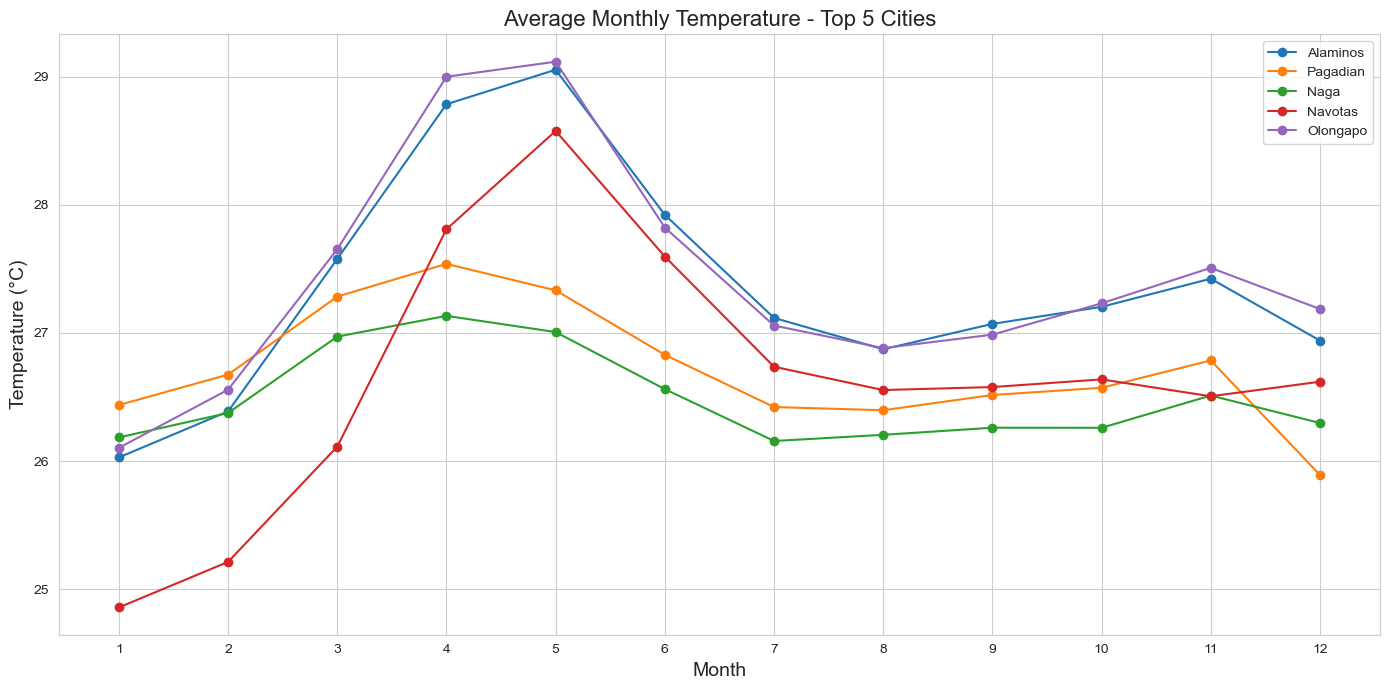

In [6]:
display(Markdown("### Monthly Temperature Trends per City"))

top_cities = df['city_name'].value_counts().index[:5]

plt.figure(figsize=(14,7))
for city in top_cities:
    city_data = monthly_city[monthly_city['city_name']==city]
    plt.plot(city_data['month'], city_data['temperature_2m_mean'], marker='o', label=city)

plt.title("Average Monthly Temperature - Top 5 Cities", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
seasonal_city = df.groupby(['city_name','season']).agg({
    'temperature_2m_mean':'mean',
    'temperature_2m_max':'mean',
    'temperature_2m_min':'mean',
    'apparent_temperature_max':'mean',
    'apparent_temperature_min':'mean'
}).reset_index()

season_order = ['DJF', 'MAM', 'JJA', 'SON']
seasonal_city['season'] = pd.Categorical(seasonal_city['season'], categories=season_order, ordered=True)
seasonal_city = seasonal_city.sort_values(['city_name', 'season'])

display(seasonal_city.head())

,city_name,season,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,Alaminos,DJF,26.597254,28.576674,25.130665,32.815410,26.870953
2,Alaminos,MAM,28.468370,31.820435,26.068804,37.343913,30.049239
1,Alaminos,JJA,27.296957,29.466196,25.763804,35.700000,30.500217
3,Alaminos,SON,27.231978,29.569231,25.464505,35.372857,29.700220
4,Angeles City,DJF,25.465391,28.452715,23.007567,31.695344,23.924390


### Seasonal Average Temperatures per City

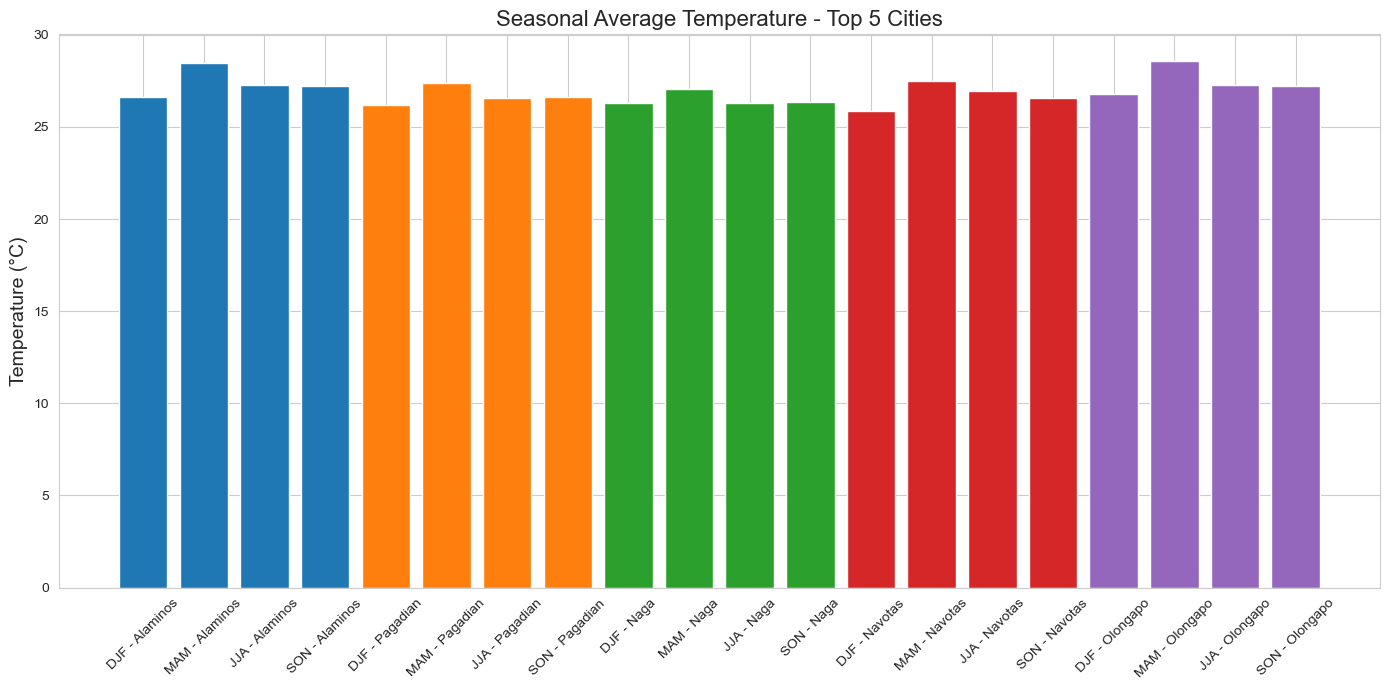

In [11]:
display(Markdown("### Seasonal Average Temperatures per City"))

plt.figure(figsize=(14,7))
for city in top_cities:
    city_data = seasonal_city[seasonal_city['city_name']==city]
    plt.bar(city_data['season'].astype(str) + ' - ' + city, city_data['temperature_2m_mean'])

plt.title("Seasonal Average Temperature - Top 5 Cities", fontsize=16)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Seasonal Temperature Extremes

,city_name,season,temperature_2m_max,temperature_2m_min
527,Urdaneta,MAM,39.2,16.9
175,Dapitan,MAM,38.9,21.4
275,Lapu-Lapu City,MAM,38.9,21.4
327,Mandaue City,MAM,38.8,21.3
143,Cebu City,MAM,38.7,21.2


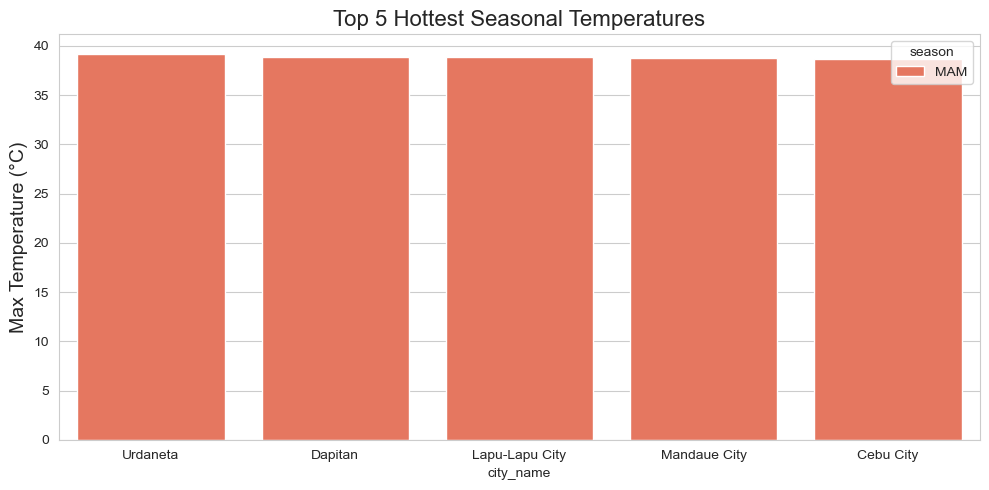

,city_name,season,temperature_2m_max,temperature_2m_min
24,Baguio,DJF,24.7,7.2
26,Baguio,MAM,27.3,10.2
27,Baguio,SON,24.6,10.9
469,Tabuk,DJF,30.3,12.3
133,Cauayan,DJF,31.3,12.8


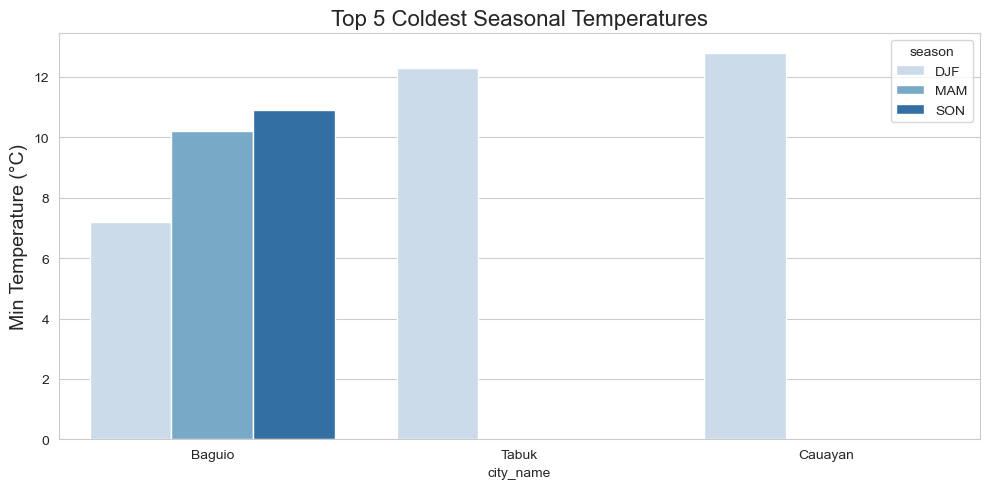

In [12]:
display(Markdown("### Seasonal Temperature Extremes"))

seasonal_extremes = df.groupby(['city_name','season']).agg({
    'temperature_2m_max':'max',
    'temperature_2m_min':'min'
}).reset_index()

# Top 5 hottest seasonal max temperatures
top_hottest = seasonal_extremes.sort_values('temperature_2m_max', ascending=False).head(5)
display(top_hottest)

plt.figure(figsize=(10,5))
sns.barplot(data=top_hottest, x='city_name', y='temperature_2m_max', hue='season', palette='Reds')
plt.title("Top 5 Hottest Seasonal Temperatures", fontsize=16)
plt.ylabel("Max Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

# Top 5 coldest seasonal min temperatures
top_coldest = seasonal_extremes.sort_values('temperature_2m_min', ascending=True).head(5)
display(top_coldest)

plt.figure(figsize=(10,5))
sns.barplot(data=top_coldest, x='city_name', y='temperature_2m_min', hue='season', palette='Blues')
plt.title("Top 5 Coldest Seasonal Temperatures", fontsize=16)
plt.ylabel("Min Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

### Apparent vs Actual Temperature per Season

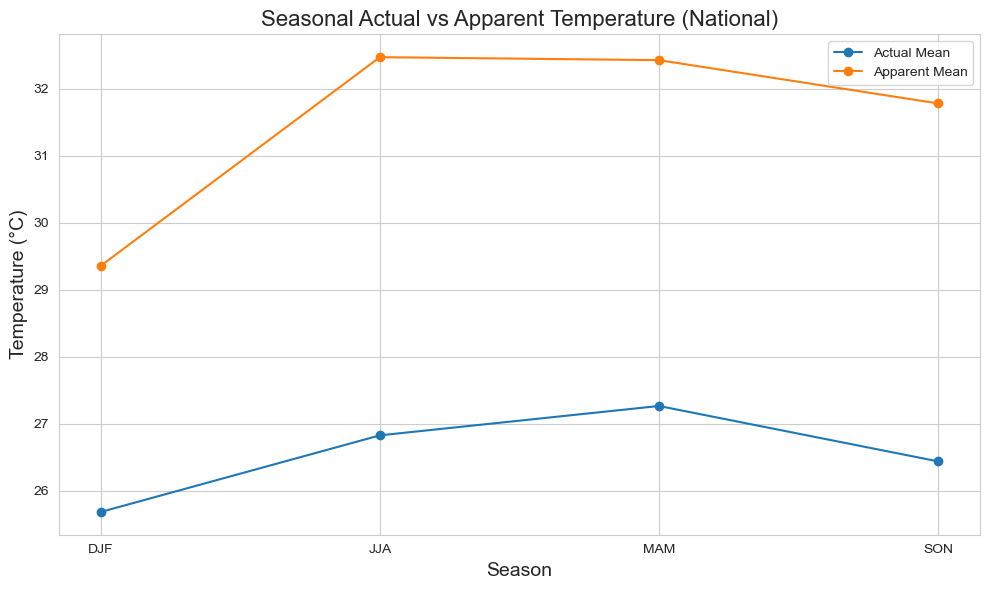

In [13]:
display(Markdown("### Apparent vs Actual Temperature per Season"))

if 'apparent_temperature_max' in df.columns and 'apparent_temperature_min' in df.columns:
    df['apparent_temperature_mean'] = (df['apparent_temperature_max'] + df['apparent_temperature_min'])/2
    seasonal_app = df.groupby(['season']).agg({
        'temperature_2m_mean':'mean',
        'apparent_temperature_mean':'mean'
    }).reset_index()

    plt.figure(figsize=(10,6))
    plt.plot(seasonal_app['season'], seasonal_app['temperature_2m_mean'], marker='o', label='Actual Mean')
    plt.plot(seasonal_app['season'], seasonal_app['apparent_temperature_mean'], marker='o', label='Apparent Mean')
    plt.title("Seasonal Actual vs Apparent Temperature (National)", fontsize=16)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.xlabel("Season", fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    display(Markdown("No apparent temperature columns available for comparison."))

In [ ]:
seasonal_city.to_csv("../data/processed/phil_temp_seasonal_city.csv", index=False)
display(Markdown("Seasonal aggregated data saved to `data/processed/phil_temp_seasonal_city.csv`"))